# Housing Prediction London


In [1]:
!pip install sklearn

In [237]:
# import dependencies
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plotty
import missingno as msno
%matplotlib inline

In [235]:
# Load the datasets
df = pd.read_csv('../data/raw/01_06_2014_until_04_06_2019.csv')

In [ ]:
del df['column_name']

In [ ]:
# Encode binary values
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [ ]:
# We can load the 1gb master csv of postcode data into memory with pandas
postcode_data = pd.read_csv('../data/raw/NSPL_MAY_2019_UK.csv', low_memory=False)

In [9]:
pricing_data.deed_date.describe()

count         345551
unique          1592
top       31/03/2016
freq            3086
Name: deed_date, dtype: object

In [ ]:
pricing_data.deed_date.order

In [17]:
pricing_data.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url
0,8355F008-E750-55C5-E053-6B04A8C0D090,233500,2018-11-26,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,2014-08-07,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,2018-06-12,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,2017-03-31,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,2017-05-23,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [19]:
pricing_data.sort_values(by=['deed_date'])

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url
252181,251D6F40-F7C9-49A6-AF9E-40F2D682137F,250000,2014-01-06,SW16 4AQ,S,N,F,NaN,1455A,LONDON ROAD,NaN,LONDON,CROYDON,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
40317,92B21AD5-39BD-47F2-8906-C6186770481A,235000,2014-01-06,E18 1FF,F,Y,L,FLAT 11,"SCENIX HOUSE, 86",CHIGWELL ROAD,NaN,LONDON,REDBRIDGE,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
214191,5CE703F4-457C-4902-B1B9-25F065A8F8CC,205000,2014-01-07,SE4 1UY,F,N,L,FLAT 16,"LEIGH COURT, 213",LEWISHAM WAY,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
340283,F2BF0719-32B0-4531-B98D-31D7ABED0456,490000,2014-01-07,W9 3BL,F,N,L,FIRST FLOOR FLAT,249,PORTNALL ROAD,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
112115,5E590993-DE0B-4A23-9637-76C0AB2C5D99,1270000,2014-01-07,N7 6JG,T,N,F,NaN,26,WINDSOR ROAD,NaN,LONDON,ISLINGTON,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
320324,204B09F3-F340-40D4-AA47-BA03F13E006F,873000,2014-01-07,W2 4ET,F,N,L,FLAT 6,"THE LIMES, 34 - 36",LINDEN GARDENS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
193730,5380E51B-BD0B-47A9-8E18-BEFE5883BA95,250000,2014-01-07,SE20 8EN,F,N,L,FLAT 5,DOVER HOUSE,ANERLEY ROAD,NaN,LONDON,BROMLEY,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
99273,3C50FC8C-53E4-468C-96FA-658F9AA5DFEC,290000,2014-01-07,N20 9HA,F,N,L,FLAT 5,HIGHLANDS,OAKLEIGH ROAD NORTH,NaN,LONDON,BARNET,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
196236,54A670F5-FF60-4FBD-8BAF-054D55B61B28,270000,2014-01-07,SE22 8BZ,F,N,L,FLAT 47A,FELBRIDGE HOUSE,DOG KENNEL HILL ESTATE,NaN,LONDON,SOUTHWARK,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
295561,C992C044-8310-4261-A6B9-FC860945B425,1455000,2014-01-07,SW6 7JP,T,N,F,NaN,67,REPORTON ROAD,NaN,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [20]:
pricing_data.deed_date.min()

Timestamp('2014-01-06 00:00:00')

In [63]:
pricing_data.dtypes

price_paid                       int64
deed_date               datetime64[ns]
property_type                   object
new_build                       object
estate_type                     object
district                        object
transaction_category            object
dtype: object

In [66]:
pricing_data.property_type.unique()

array(['F', 'T', 'O', 'S', 'D'], dtype=object)

In [67]:
pricing_data.new_build.unique()

array(['N', 'Y'], dtype=object)

In [68]:
pricing_data.estate_type.unique()


array(['L', 'F'], dtype=object)

In [69]:
pricing_data.district.unique()

array(['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW',
       'WALTHAM FOREST', 'REDBRIDGE', 'HARINGEY', 'NEWHAM',
       'BARKING AND DAGENHAM', 'LEWISHAM', 'LAMBETH', 'SOUTHWARK',
       'WANDSWORTH', 'GREENWICH', 'BRENT', 'EALING', 'HOUNSLOW',
       'ENFIELD', 'HILLINGDON', 'EPPING FOREST', 'ISLINGTON', 'CAMDEN',
       'CITY OF WESTMINSTER', 'BARNET', 'HAMMERSMITH AND FULHAM',
       'HARLOW', 'CROYDON', 'BROMLEY', 'BEXLEY', 'SUTTON',
       'KINGSTON UPON THAMES', 'KENSINGTON AND CHELSEA',
       'RICHMOND UPON THAMES', 'MERTON'], dtype=object)

In [71]:
pricing_data.transaction_category.unique()

array(['A', 'B'], dtype=object)

In [136]:
df = df[['price_paid', 'deed_date','property_type','new_build', 'estate_type', 'district','transaction_category']]

# Description of Data

In [244]:
# price_paid               int64 [233500, 270000, 176000, 450000, 440000]
# money, possibly look into normalizing
# deed_date               object ['05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017']
# date object convert to timestamp and then add days since value
# property_type           object ['F', 'T', 'O', 'S', 'D']
# categorical data perform label encoder
# new_build               object ['N', 'Y']
# categorical data perform label encoder
# estate_type             object ['L', 'F']
# categorical data perform label encoder
# district                object ['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW', 'WALTHAM FOREST']
# categorical data perform label encoder
# transaction_category    object ['A', 'B']
# categorical data perform label encoder

# Correlation matrix of each column pair

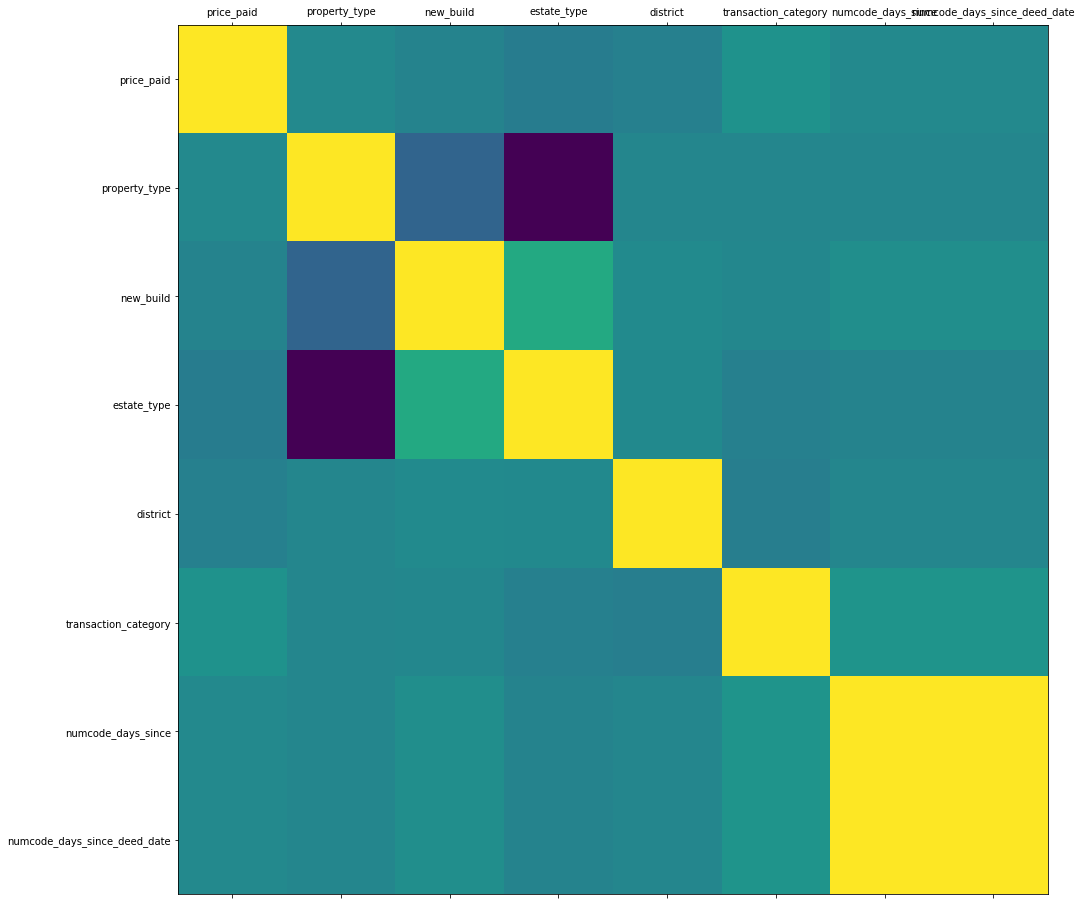

In [218]:
def plot_corr(df, size=16):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                               0 ------------------>  1
                                               Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()    ## data frame correlation function
    fig, ax = plotty.subplots(figsize=(size, size))
    ax.matshow(corr)    # color code the rectangles by correlation value
    plotty.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plotty.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

plot_corr(df)

# Drop variables we're not interested in

In [243]:
df.drop(['unique_id', 'paon', 'saon', 'linked_data_url', 'street', 'locality', 'county', 'town','postcode'], axis=1)

,price_paid,deed_date,property_type,new_build,estate_type,district,transaction_category
0,233500,26/11/2018,F,N,L,TOWER HAMLETS,A
1,270000,08/07/2014,F,N,L,TOWER HAMLETS,A
2,176000,06/12/2018,F,N,L,TOWER HAMLETS,A
3,450000,31/03/2017,F,N,L,TOWER HAMLETS,B
4,440000,23/05/2017,F,N,L,TOWER HAMLETS,A
5,430500,18/10/2018,F,N,L,TOWER HAMLETS,A
6,390000,19/12/2018,F,N,L,TOWER HAMLETS,A
7,490000,04/09/2017,F,N,L,TOWER HAMLETS,A
8,455000,23/10/2015,F,N,L,TOWER HAMLETS,A
9,378000,25/08/2015,F,N,L,TOWER HAMLETS,A


# Deal with Date type

In [211]:
# Create features for year, month, day, hour, and minute
df['numcode_days_since'] = df['days_since'].dt.days
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

In [214]:
df[['price_paid', 'deed_date', 'property_type', 'new_build', 'estate_type', 'district', 'transaction_category','numcode_days_since']].to_pickle('../data/processed/date_ints.pkl')

In [216]:
df[['price_paid', 'property_type', 'new_build', 'estate_type', 'district', 'transaction_category','numcode_days_since']].to_pickle('../data/processed/numeric_only.pkl')

In [215]:
!ls ../data/processed/

data.pkl      date_ints.pkl


In [204]:
df.to_pickle('../data/processed/data.pkl')

In [205]:
unpickled = pd.read_pickle('../data/processed/data.pkl')
unpickled

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url,days_since,numcode_days_since
0,8355F008-E750-55C5-E053-6B04A8C0D090,233500,2018-11-26,E1 0AD,1,0,1,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1785 days,1785
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,2014-08-07,E1 0AD,1,0,1,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,213 days,213
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,2018-06-12,E1 0AD,1,0,1,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1618 days,1618
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,2017-03-31,E1 0AE,1,0,1,NaN,296,CABLE STREET,NaN,LONDON,31,GREATER LONDON,1,http://landregistry.data.gov.uk/data/ppi/trans...,1180 days,1180
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,2017-05-23,E1 0AE,1,0,1,NaN,314,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1233 days,1233
5,79A74E21-6CCB-1289-E053-6B04A8C01627,430500,2018-10-18,E1 0AE,1,0,1,NaN,316,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1746 days,1746
6,80E1AA97-F8D2-7BF8-E053-6C04A8C00BF2,390000,2018-12-19,E1 0AE,1,0,1,NaN,332,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1808 days,1808
7,5A9D8B55-0465-68EB-E053-6B04A8C0D293,490000,2017-04-09,E1 0AE,1,0,1,NaN,338,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1189 days,1189
8,25EA59F9-A161-4D50-E050-A8C0630562D0,455000,2015-10-23,E1 0AE,1,0,1,NaN,338,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,655 days,655
9,BA8840F9-5801-45B5-B164-963078664015,378000,2015-08-25,E1 0AE,1,0,1,NaN,362,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,596 days,596


In [169]:
df.deed_date = pd.to_datetime(df.deed_date)

In [ ]:
days_since = lambda x: x - df.deed_date.min()

In [174]:
df['days_since'] = df['deed_date'].map(days_since)

In [177]:
df.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url,days_since
0,8355F008-E750-55C5-E053-6B04A8C0D090,233500,2018-11-26,E1 0AD,1,0,1,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1785 days
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,2014-08-07,E1 0AD,1,0,1,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,213 days
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,2018-06-12,E1 0AD,1,0,1,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1618 days
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,2017-03-31,E1 0AE,1,0,1,NaN,296,CABLE STREET,NaN,LONDON,31,GREATER LONDON,1,http://landregistry.data.gov.uk/data/ppi/trans...,1180 days
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,2017-05-23,E1 0AE,1,0,1,NaN,314,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1233 days


In [ ]:
# price_paid               int64 [233500, 270000, 176000, 450000, 440000]
# money, possibly look into normalizing
# deed_date               object ['05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017']
# date object convert to timestamp and then add days since value
# property_type           object ['F', 'T', 'O', 'S', 'D']
# categorical data perform label encoder
# new_build               object ['N', 'Y']
# categorical data perform label encoder
# estate_type             object ['L', 'F']
# categorical data perform label encoder
# district                object ['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW', 'WALTHAM FOREST']
# categorical data perform label encoder
# transaction_category    object ['A', 'B']
# categorical data perform label encoder

In [176]:
df['property_type'] = df[['property_type']].apply(preprocessing.LabelEncoder().fit_transform)
df['new_build'] = df[['new_build']].apply(preprocessing.LabelEncoder().fit_transform)
df['estate_type'] = df[['estate_type']].apply(preprocessing.LabelEncoder().fit_transform)
df['district'] = df[['district']].apply(preprocessing.LabelEncoder().fit_transform)
df['transaction_category'] = df[['transaction_category']].apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
#%%
# Fit the encoder to the pandas column
le.fit(df['property_type'])
#%%
# View the labels
list(le.classes_)
#%%
# Apply the fitted encoder to the pandas column
df['property_type_transform'] = le.transform(df['property_type'])

In [34]:
selected_columns = pricing_data[['price_paid', 'deed_date', 'property_type', 'new_build', 'estate_type', 'street','district', 'county', 'transaction_category']]

In [48]:
pricing_data = pricing_data[['price_paid', 'deed_date', 'property_type', 'new_build', 'estate_type','district', 'transaction_category']]

In [49]:
pricing_data.dtypes

price_paid                       int64
deed_date               datetime64[ns]
property_type                   object
new_build                       object
estate_type                     object
district                        object
transaction_category            object
dtype: object

In [60]:
pricing_data.head()

,price_paid,deed_date,property_type,new_build,estate_type,district,transaction_category
0,233500,2018-11-26,F,N,L,TOWER HAMLETS,A
1,270000,2014-08-07,F,N,L,TOWER HAMLETS,A
2,176000,2018-06-12,F,N,L,TOWER HAMLETS,A
3,450000,2017-03-31,F,N,L,TOWER HAMLETS,B
4,440000,2017-05-23,F,N,L,TOWER HAMLETS,A


In [59]:
pricing_data.head().deed_date.apply(days_since)

0   1785 days
1    213 days
2   1618 days
3   1180 days
4   1233 days
Name: deed_date, dtype: timedelta64[ns]

In [41]:
selected_columns['district'].unique()

array(['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW',
       'WALTHAM FOREST', 'REDBRIDGE', 'HARINGEY', 'NEWHAM',
       'BARKING AND DAGENHAM', 'LEWISHAM', 'LAMBETH', 'SOUTHWARK',
       'WANDSWORTH', 'GREENWICH', 'BRENT', 'EALING', 'HOUNSLOW',
       'ENFIELD', 'HILLINGDON', 'EPPING FOREST', 'ISLINGTON', 'CAMDEN',
       'CITY OF WESTMINSTER', 'BARNET', 'HAMMERSMITH AND FULHAM',
       'HARLOW', 'CROYDON', 'BROMLEY', 'BEXLEY', 'SUTTON',
       'KINGSTON UPON THAMES', 'KENSINGTON AND CHELSEA',
       'RICHMOND UPON THAMES', 'MERTON'], dtype=object)

In [74]:
list(pricing_data.deed_date.head())

[Timestamp('2018-11-26 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2018-06-12 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-05-23 00:00:00')]

# Export Figures

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plotty.plot([1,2])
savefig('test.png', bbox_inches='tight')

# Group bys
- [ ] year
- [ ] Borough
- [ ] Property type

In [248]:
df

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url
0,8355F008-E750-55C5-E053-6B04A8C0D090,233500,26/11/2018,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,08/07/2014,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
5,79A74E21-6CCB-1289-E053-6B04A8C01627,430500,18/10/2018,E1 0AE,F,N,L,NaN,316,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
6,80E1AA97-F8D2-7BF8-E053-6C04A8C00BF2,390000,19/12/2018,E1 0AE,F,N,L,NaN,332,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
7,5A9D8B55-0465-68EB-E053-6B04A8C0D293,490000,04/09/2017,E1 0AE,F,N,L,NaN,338,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
8,25EA59F9-A161-4D50-E050-A8C0630562D0,455000,23/10/2015,E1 0AE,F,N,L,NaN,338,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
9,BA8840F9-5801-45B5-B164-963078664015,378000,25/08/2015,E1 0AE,F,N,L,NaN,362,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


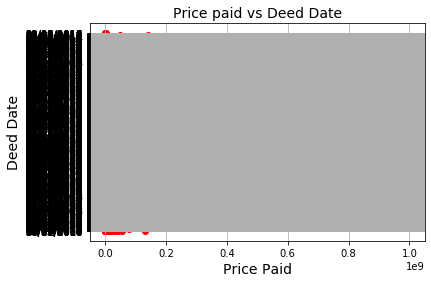

In [231]:
plotty.scatter(df['price_paid'], df['deed_date'], color='red')
plotty.title('Price paid vs Deed Date', fontsize=14)
plotty.xlabel('Price Paid', fontsize=14)
plotty.ylabel('Deed Date', fontsize=14)
plotty.grid(True)
plotty.show()

# Transform latlon to make spatial sense
[source](https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature)

In [ ]:
def transform_latlon(lat, lon):
    x = cos(lat) * cos(lon)
    y = cos(lat) * sin(lon), 
    z = sin(lat)
    return (x, y, z)